In [1]:
import numpy as np
import matplotlib.pyplot as plt
import legwork as lw
import astropy.units as u
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid, cumulative_trapezoid
from astropy.cosmology import Planck18, z_at_value
from scipy.integrate import trapezoid
import paths
import deepdish as dd
from matplotlib import colors
from schwimmbad import MultiPool
import tqdm
import utils
import paths

In [2]:
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 12

# update various fontsizes to match
params = {'figure.figsize': (6,4),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)


# set up the LISA frequency grid
f_LISA = np.logspace(-1, -5, 150) * u.Hz

# set up the LIGO eccentricity range
e_LIGO = np.logspace(-6, np.log10(0.0005), 10)
e_LIGO = np.append(0, e_LIGO)
e_LIGO_round = np.array([f"{e:.2e}" for e in e_LIGO])


# get the mass, mass ratio, and rate grids
down_samp_fac=25
mass_1, mass_ratio, M1, Q, dN_dm1dqdVcdt = utils.get_LIGO_rate(down_samp_fac=down_samp_fac)

mass_1 = mass_1
mass_ratio = mass_ratio
MM, QQ, EE_LIGO, FF = np.meshgrid(mass_1, mass_ratio, e_LIGO, f_LISA, indexing='ij')

In [3]:
#dat_in = list(zip(EE_LIGO.flatten(), FF.flatten(), MM.flatten(), QQ.flatten()*MM.flatten()))
#
#with MultiPool(processes=128) as pool:
#    dat_out = list(tqdm.tqdm(pool.imap(utils.get_e_LISA_t_LIGO, dat_in), total=len(dat_in)))
#    
#EE_LISA, TT_LIGO = zip(*dat_out)
#
#EE_LISA = np.array(EE_LISA).reshape(FF.shape)
#TT_LIGO = np.array(TT_LIGO).reshape(FF.shape) * u.yr
#
#np.save(paths.data / 't_merge', TT_LIGO.value)
#np.save(paths.data / 'e_LISA', EE_LISA)

In [4]:

#def chunk_list(long_list, num_chunks):
#    avg = len(long_list) / float(num_chunks)
#    chunks = []
#    last = 0.0
#
#    while last < len(long_list):
#        chunks.append(long_list[int(last):int(last + avg)])
#        last += avg
#
#    return chunks
#
#
#num_chunks = 10
#
#snr_thresh = 12
#dat_in = list(zip(MM.flatten(), QQ.flatten(), EE_LISA.flatten(), FF.flatten(), snr_thresh * np.ones(len(MM.flatten()))))
#
#chunked_list = chunk_list(dat_in, num_chunks)
#for ii, chunk in enumerate(chunked_list[3:]):
#    print('running chunk: ' + str(ii+3))
#    with MultiPool(processes=128) as pool:
#        dat_out = list(tqdm.tqdm(pool.imap(utils.get_Vc_Dh, chunk), total=len(chunk)))
#        DH, VC = zip(*dat_out)
#        DH = np.array(DH)
#        VC = np.array(VC)
#        
#        np.save(paths.data / f'comoving_volume_{ii+3}', VC)
#        np.save(paths.data / f'horizon_distance_{ii+3}', DH)

In [5]:
EE_LISA = np.load(paths.data / 'e_LISA.npy')
TT_LISA = np.load(paths.data / 't_merge.npy') * u.Gyr
VC = np.load(paths.data / 'comoving_volume.npy') * u.Gpc**3
DH = np.load(paths.data / 'horizon_distance.npy') * u.Gpc 

In [6]:
snr_thresh_data = 12
snr_thresh_new = 7

In [7]:
DH = DH * snr_thresh_data / snr_thresh_new
VC = 4/3 * np.pi * DH**3

In [8]:
MM.flatten().shape

(1320000,)

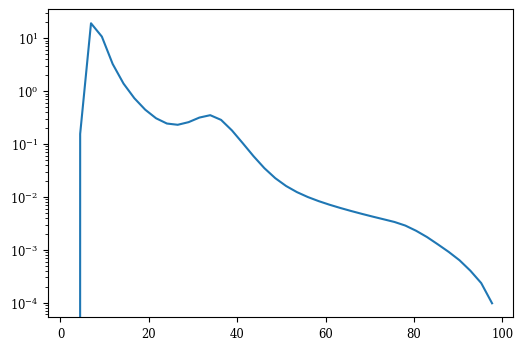

In [9]:
plt.plot(mass_1, dN_dm1dqdVcdt[-1,:])
plt.yscale('log')

In [10]:
dT_LIGO_df_LISA = utils.dTmerger_df(MM, QQ*MM, FF, EE_LISA).to(u.yr / u.Hz)


In [11]:
import cmasher as cmr

In [12]:
cs = cmr.take_cmap_colors('cmr.dusk', len(mass_1), cmap_range=(0.15, 0.9), return_fmt='hex')

In [13]:
mass_1

<Quantity [ 2.        ,  4.45245245,  6.9049049 ,  9.35735736, 11.80980981,
           14.26226226, 16.71471471, 19.16716717, 21.61961962, 24.07207207,
           26.52452452, 28.97697698, 31.42942943, 33.88188188, 36.33433433,
           38.78678679, 41.23923924, 43.69169169, 46.14414414, 48.5965966 ,
           51.04904905, 53.5015015 , 55.95395395, 58.40640641, 60.85885886,
           63.31131131, 65.76376376, 68.21621622, 70.66866867, 73.12112112,
           75.57357357, 78.02602603, 80.47847848, 82.93093093, 85.38338338,
           87.83583584, 90.28828829, 92.74074074, 95.19319319, 97.64564565] solMass>

In [14]:
mass_ratio, e_LIGO

(array([0.1       , 0.14509018, 0.19018036, 0.23527054, 0.28036072,
        0.3254509 , 0.37054108, 0.41563126, 0.46072144, 0.50581162,
        0.5509018 , 0.59599198, 0.64108216, 0.68617234, 0.73126253,
        0.77635271, 0.82144289, 0.86653307, 0.91162325, 0.95671343]),
 array([0.00000000e+00, 1.00000000e-06, 1.99473660e-06, 3.97897410e-06,
        7.93700526e-06, 1.58322349e-05, 3.15811383e-05, 6.29960525e-05,
        1.25660531e-04, 2.50659661e-04, 5.00000000e-04]))

In [15]:
np.shape(DH)

(40, 20, 11, 150)

Text(0, 0.5, 'horizon distance [Gpc]')

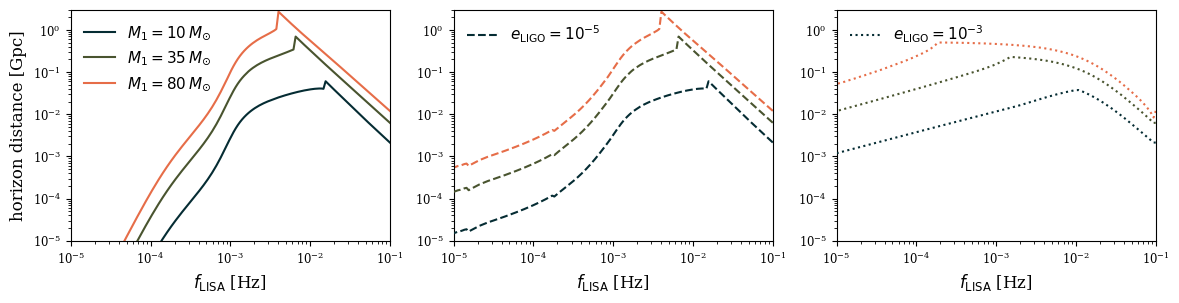

In [16]:
ind_m_10 = 3
ind_m_35 = 14
ind_m_80 = 32
ind_q05 = 9
ind_q09 = 18
ind_circ = 0
ind_ecc_mid = 4
ind_ecc_high = 10

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,3))
ax1.plot(f_LISA.value, DH[ind_m_10,ind_q09,ind_circ,:].value, ls='-', color=cs[ind_m_10], zorder=10, label=r'$M_1=10\,M_{\odot}$')
ax2.plot(f_LISA.value, DH[ind_m_10,ind_q09,ind_ecc_mid,:].value, ls='--', color=cs[ind_m_10], zorder=10, label=r'$e_{\rm{LIGO}}=10^{-5}$')
ax3.plot(f_LISA.value, DH[ind_m_10,ind_q09,ind_ecc_high,:].value, ls=':', color=cs[ind_m_10], zorder=10, label=r'$e_{\rm{LIGO}}=10^{-3}$')
#plt.fill_between(f_LISA.value, DH[ind_m_10,ind_q09,ind_circ,:].value, DH[ind_m_10,ind_q09,ind_ecc_high,:].value, color=cs[ind_m_10], alpha=0.5, zorder=10)

ax1.plot(f_LISA.value, DH[ind_m_35,ind_q09,ind_circ,:].value, ls='-', color=cs[ind_m_35], zorder=5, label=r'$M_1=35\,M_{\odot}$')
ax2.plot(f_LISA.value, DH[ind_m_35,ind_q09,ind_ecc_mid,:].value, ls='--', color=cs[ind_m_35], zorder=5)
ax3.plot(f_LISA.value, DH[ind_m_35,ind_q09,ind_ecc_high,:].value, ls=':', color=cs[ind_m_35], zorder=5)
#plt.fill_between(f_LISA.value, DH[ind_m_35,ind_q09,ind_circ,:].value, DH[ind_m_35,ind_q09,ind_ecc_high,:].value, color=cs[ind_m_35], alpha=0.5, zorder=5)


ax1.plot(f_LISA.value, DH[ind_m_80,ind_q09,ind_circ,:].value, ls='-', color=cs[ind_m_80], label=r'$M_1=80\,M_{\odot}$')
ax2.plot(f_LISA.value, DH[ind_m_80,ind_q09,ind_ecc_mid,:].value, ls='--', color=cs[ind_m_80])
ax3.plot(f_LISA.value, DH[ind_m_80,ind_q09,ind_ecc_high,:].value, ls=':', color=cs[ind_m_80])
#plt.fill_between(f_LISA.value, DH[ind_m_80,ind_q09,ind_circ,:].value, DH[ind_m_80,ind_q09,ind_ecc_high,:].value, color=cs[ind_m_80], alpha=0.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-5, 3)
ax1.set_xlim(1e-5, 1e-1)
ax1.set_xlabel(r'$f_{\rm{LISA}}$ [Hz]')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(1e-5, 3)
ax2.set_xlim(1e-5, 1e-1)
ax2.set_xlabel(r'$f_{\rm{LISA}}$ [Hz]')

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylim(1e-5, 3)
ax3.set_xlim(1e-5, 1e-1)
ax3.set_xlabel(r'$f_{\rm{LISA}}$ [Hz]')

ax1.legend(loc='upper left', frameon=False, prop={'size':11})
ax2.legend(loc='upper left', frameon=False, prop={'size':11})
ax3.legend(loc='upper left', frameon=False, prop={'size':11})

ax1.set_ylabel('horizon distance [Gpc]')

Text(0, 0.5, '$\\partial T_{\\rm{merge}}(e_{\\rm{LISA}},f_{\\rm{LISA}})/\\partial f_{\\rm{LISA}}$')

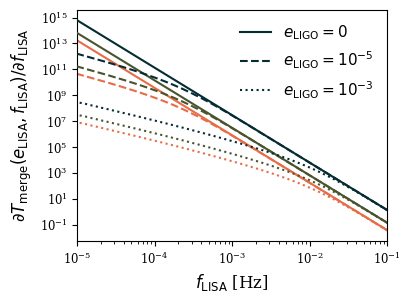

In [17]:
ind_m_10 = 3
ind_m_35 = 14
ind_m_80 = 32
ind_q05 = 9
ind_q09 = 18
ind_circ = 0
ind_ecc_mid = 4
ind_ecc_high = 10

fig, (ax1) = plt.subplots(1, 1, figsize=(4,3))
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_10,ind_q09,ind_circ,:].to(u.yr/u.Hz).value, ls='-', color=cs[ind_m_10], zorder=10, label=r'$e_{\rm{LIGO}}=0$')
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_10,ind_q09,ind_ecc_mid,:].to(u.yr/u.Hz).value, ls='--', color=cs[ind_m_10], zorder=10, label=r'$e_{\rm{LIGO}}=10^{-5}$')
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_10,ind_q09,ind_ecc_high,:].to(u.yr/u.Hz).value, ls=':', color=cs[ind_m_10], zorder=10, label=r'$e_{\rm{LIGO}}=10^{-3}$')
#plt.fill_between(f_LISA.value, DH[ind_m_10,ind_q09,ind_circ,:].value, DH[ind_m_10,ind_q09,ind_ecc_high,:].value, color=cs[ind_m_10], alpha=0.5, zorder=10)

ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_35,ind_q09,ind_circ,:].to(u.yr/u.Hz).value, ls='-', color=cs[ind_m_35], zorder=5)#
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_35,ind_q09,ind_ecc_mid,:].to(u.yr/u.Hz).value, ls='--', color=cs[ind_m_35], zorder=5)
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_35,ind_q09,ind_ecc_high,:].to(u.yr/u.Hz).value, ls=':', color=cs[ind_m_35], zorder=5)
#plt.fill_between(f_LISA.value, DH[ind_m_35,ind_q09,ind_circ,:].value, DH[ind_m_35,ind_q09,ind_ecc_high,:].value, color=cs[ind_m_35], alpha=0.5, zorder=5)


ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_80,ind_q09,ind_circ,:].to(u.yr/u.Hz).value, ls='-', color=cs[ind_m_80])
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_80,ind_q09,ind_ecc_mid,:].to(u.yr/u.Hz).value, ls='--', color=cs[ind_m_80])
ax1.plot(f_LISA.value, dT_LIGO_df_LISA[ind_m_80,ind_q09,ind_ecc_high,:].to(u.yr/u.Hz).value, ls=':', color=cs[ind_m_80])
#plt.fill_between(f_LISA.value, DH[ind_m_80,ind_q09,ind_circ,:].value, DH[ind_m_80,ind_q09,ind_ecc_high,:].value, color=cs[ind_m_80], alpha=0.5)

ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_ylim(1e-5, 3)
ax1.set_xlim(1e-5, 1e-1)
ax1.set_xlabel(r'$f_{\rm{LISA}}$ [Hz]')

ax1.legend(loc='upper right', frameon=False, prop={'size':11})

ax1.set_ylabel(r'$\partial T_{\rm{merge}}(e_{\rm{LISA}},f_{\rm{LISA}})/\partial f_{\rm{LISA}}$')

In [18]:
LISA_norm = dT_LIGO_df_LISA * VC

In [19]:
np.shape(LISA_norm), np.shape(dN_dm1dqdVcdt)

((40, 20, 11, 150), (20, 40))

In [20]:
N_LISA_cumulative = np.zeros((len(mass_1), len(mass_ratio), len(e_LIGO), len(f_LISA)))
N_LISA = np.zeros((len(mass_1), len(mass_ratio), len(e_LIGO)))
for ee, ecc in enumerate(e_LIGO):
    for mm, m in enumerate(mass_1):
        for qq, q in enumerate(mass_ratio):
            arg = (LISA_norm[mm, qq, ee,:] * dN_dm1dqdVcdt[qq,mm]).to(u.Hz**(-1) / u.Msun)
            N_LISA_cumulative[mm,qq,ee,:] = cumulative_trapezoid(arg, -f_LISA, initial=0)
            N_LISA[mm,qq,ee] = trapezoid(arg, -f_LISA).value
            


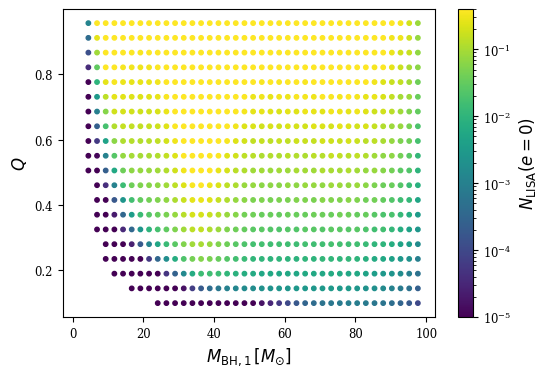

In [21]:
plt.scatter(M1[:,:], Q[:,:], c=N_LISA[:,:,0].T, s=10, norm=colors.LogNorm(vmin=1e-5, vmax=0.4))
plt.xlabel(r'$M_{\rm{BH,1}}\,[M_{\odot}]$')
plt.ylabel(r'$Q$')
plt.colorbar(label=r'$N_{\rm{LISA}}(e=0)$')

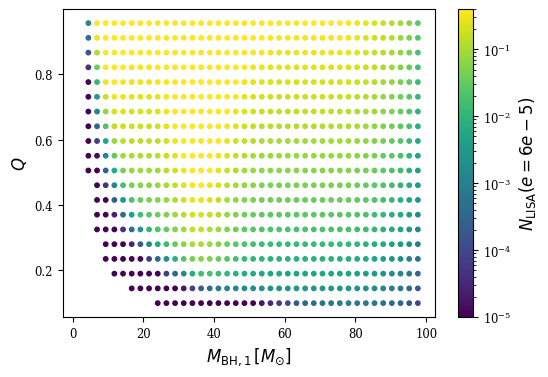

In [22]:
#print(e_LIGO[7])
plt.scatter(M1[:,:], Q[:,:], c=N_LISA[:,:,7].T, s=10, norm=colors.LogNorm(vmin=1e-5, vmax=0.4))
plt.xlabel(r'$M_{\rm{BH,1}}\,[M_{\odot}]$')
plt.ylabel(r'$Q$')
plt.colorbar(label=r'$N_{\rm{LISA}}(e=6e-5)$')

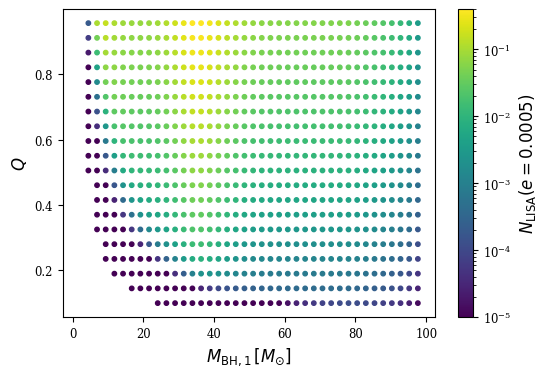

In [23]:
plt.scatter(M1[:,:], Q[:,:], c=N_LISA[:,:,10].T, s=10, norm=colors.LogNorm(vmin=1e-5, vmax=0.4))
plt.xlabel(r'$M_{\rm{BH,1}}\,[M_{\odot}]$')
plt.ylabel(r'$Q$')
plt.colorbar(label=r'$N_{\rm{LISA}}(e=0.0005)$')

In [195]:
dN_dm1_cumulative_list = []
for ee, ecc in enumerate(e_LIGO):
    dN_dm1_cumulative = np.zeros((len(mass_1),len(f_LISA)))
    for mm, m in enumerate(mass_1):
        dN_dm1_cumulative[mm,:] = trapezoid(N_LISA_cumulative[mm,:,ee,:], mass_ratio, axis=0)
    dN_dm1_cumulative_list.append(dN_dm1_cumulative)

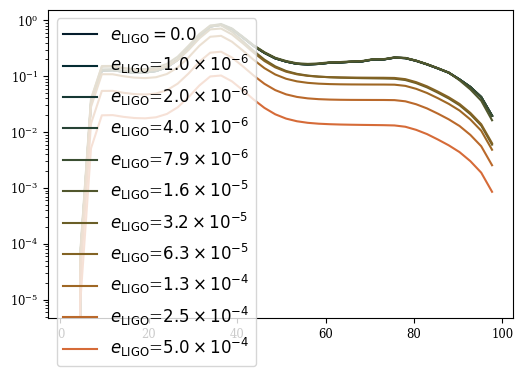

In [196]:
def format_sci_notation(num):
    exponent = int(np.floor(np.log10(num)))
    coefficient = num / 10**exponent
    return rf'${coefficient:.1f} \times 10^{{{exponent}}}$'
dN_dm1_list = []
for ii in range(0,len(e_LIGO), 1):
    dN_dm1 = []
    for mm, m in enumerate(mass_1):
        dN_dm1.append(np.max(dN_dm1_cumulative_list[ii][mm,:]))
    if ii==0:
        plt.plot(mass_1, dN_dm1, label=rf'$e_{{\rm{{LIGO}}}}={e_LIGO[ii]}$', c=cs[3*ii])
    else:
        plt.plot(mass_1, dN_dm1, label=rf'$e_{{\rm{{LIGO}}}}$={format_sci_notation(e_LIGO[ii])}', c=cs[3*ii])
    dN_dm1_list.append(dN_dm1)
plt.legend()
plt.yscale('log')


In [197]:
n_LISA = []
for ii, n in enumerate(dN_dm1_list):
    n_LISA.append(trapezoid(n/u.Msun, mass_1))

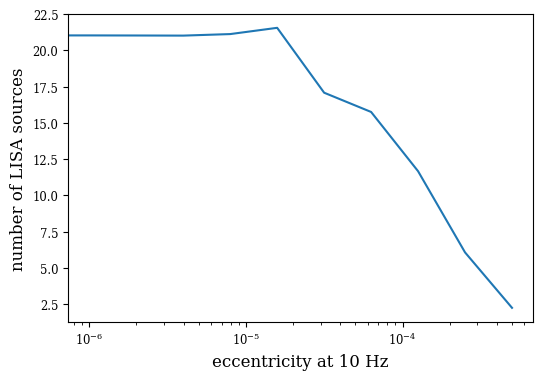

In [199]:
plt.plot(e_LIGO, n_LISA)
plt.xlabel('eccentricity at 10 Hz')
plt.ylabel('number of LISA sources')
plt.xscale('log')